In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [7]:
dataSet = pd.read_csv('dataset_clean.csv')
df = pd.DataFrame(dataSet)

print (df)


        Tanggal  BawangMerah  BawangPutihBonggol  BerasMedium  BerasPremium  \
0      1/1/2022  29203.23529         29672.64706  11048.23529   12609.41176   
1      1/2/2022  29352.64706         29648.82353  11053.23529   12622.35294   
2      1/3/2022  29137.05882         29587.94118  11046.17647   12587.05882   
3      1/4/2022  29277.64706         29542.94118  11044.41176   12595.58824   
4      1/5/2022  29241.47059         29442.05882  11026.76471   12608.82353   
...         ...          ...                 ...          ...           ...   
999   9/26/2024  29904.41176         40520.29412  13807.35294   15779.11765   
1000  9/27/2024  29957.05882         40485.29412  13813.52941   15787.64706   
1001  9/28/2024  29914.11765         40472.05882  13800.88235   15785.29412   
1002  9/29/2024  29968.52941         40472.05882  13818.82353   15772.05882   
1003  9/30/2024  29922.05882         40540.58824  13798.23529   15806.17647   

      CabaiMerahKeriting  CabaiRawitMerah  DagingAy

In [54]:
# Memisahkan Input dan Output

input_features = ['BawangMerah', 'BawangPutihBonggol', 'BerasMedium', 'BerasPremium', 'CabaiMerahKeriting', 'CabaiRawitMerah', 'DagingAyamRas', 'DagingSapiMurni', 'GulaKonsumsi', 'MinyakGorengKemasanSederhana', 'TelurAyamRas']
output_features = ['BawangMerah', 'BawangPutihBonggol', 'BerasMedium', 'BerasPremium', 'CabaiMerahKeriting', 'CabaiRawitMerah', 'DagingAyamRas', 'DagingSapiMurni', 'GulaKonsumsi', 'MinyakGorengKemasanSederhana', 'TelurAyamRas']

In [9]:
x = df[input_features].values
y = df[output_features].values

print(x)

[[29203.23529 29672.64706 11048.23529 ... 13529.41176 19440.88235
  29852.64706]
 [29352.64706 29648.82353 11053.23529 ... 13519.11765 19533.23529
  29960.     ]
 [29137.05882 29587.94118 11046.17647 ... 13537.94118 19512.35294
  29737.05882]
 ...
 [29914.11765 40472.05882 13800.88235 ... 17976.76471 18347.05882
  29257.94118]
 [29968.52941 40472.05882 13818.82353 ... 17932.05882 18395.58824
  29328.82353]
 [29922.05882 40540.58824 13798.23529 ... 17993.23529 18380.29412
  29314.70588]]


In [10]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [11]:
print(x_scaled)

[[0.11126601 0.17219008 0.0461207  ... 0.00473597 0.23730069 0.651506  ]
 [0.11512673 0.17091226 0.04748064 ... 0.00266398 0.24837731 0.66374857]
 [0.10955604 0.16764672 0.04556072 ... 0.00645276 0.24587272 0.63832428]
 ...
 [0.12963483 0.75143656 0.79480875 ... 0.89989344 0.10610978 0.58368552]
 [0.1310408  0.75143656 0.79968855 ... 0.8908951  0.1119303  0.59176897]
 [0.12984003 0.75511226 0.79408878 ... 0.90320862 0.11009595 0.59015899]]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=False)

In [13]:
timesteps = 30 #data 30 hari untuk input
n_features_input = len(input_features)
n_features_output = len(output_features)

In [14]:
def create_sequences(x,y, time_steps) :
  x_seq, y_seq = [], []

  for i in range(len(x) - time_steps) :
    x_seq.append(x[i:i+timesteps])
    y_seq.append(y[i+timesteps])

  return np.array(x_seq), np.array(y_seq)

In [15]:
x_train_seq, y_train_seq = create_sequences(x_train, y_train, timesteps)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, timesteps)

In [34]:
model = Sequential()
model.add(LSTM(60, input_shape=(timesteps, n_features_input), return_sequences=True))
# model.add(Dropout(0.2)) #jika dibutuhkan untuk mencegah terjadinya Overfitting
model.add(LSTM(60))
model.add(Dense(n_features_output))


In [35]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [36]:
hist = model.fit(x_train_seq, y_train_seq, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2310
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0748
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0508
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0392
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0344
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0293
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0281
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0264
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0255
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0252
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0253
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0244
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0223
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0218
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - lo

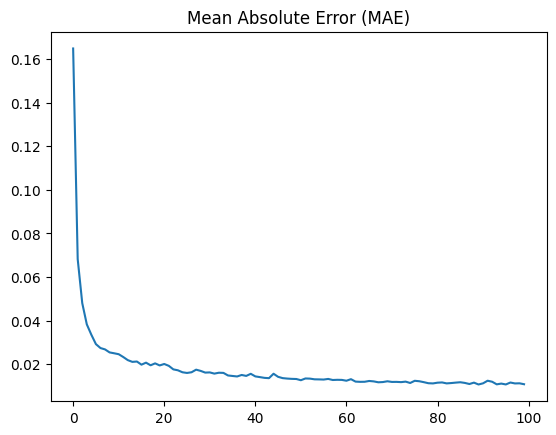

In [41]:
model_history = hist.history
loss = model_history['loss']

plt.figure()
plt.plot(loss, label='Loss')
plt.title('Mean Absolute Error (MAE)')
plt.show()

In [42]:
predictions = model.predict(x_test_seq)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [43]:
predictions = scaler.inverse_transform(predictions)


In [44]:
y_test_asli = scaler.inverse_transform(y_test_seq)

In [45]:
mae = np.mean(np.abs(predictions - y_test_asli), axis=0)

In [46]:
for i, features in enumerate(output_features):
    print(f"MAE for {features}: {mae[i]}")

MAE for BawangMerah: 1920.9058517580409
MAE for BawangPutihBonggol: 723.306645270468
MAE for BerasMedium: 63.439901463815715
MAE for BerasPremium: 99.30507739766077
MAE for CabaiMerahKeriting: 5457.384401345029
MAE for CabaiRawitMerah: 3949.128201776316
MAE for DagingAyamRas: 691.8993577850877
MAE for DagingSapiMurni: 515.7797807017544
MAE for GulaKonsumsi: 430.5857679276316
MAE for MinyakGorengKemasanSederhana: 399.3767591995614
MAE for TelurAyamRas: 307.47286579312885


In [47]:
threshold_mae_BawangMerah = (df['BawangMerah'].max() - df['BawangMerah'].min()) * 10/100
threshold_mae_BawangPutihBonggol = (df['BawangPutihBonggol'].max() - df['BawangPutihBonggol'].min()) * 10/100
threshold_mae_BerasMedium = (df['BerasMedium'].max() - df['BerasMedium'].min()) * 10/100
threshold_mae_BerasPremium = (df['BerasPremium'].max() - df['BerasPremium'].min()) * 10/100
threshold_mae_CabaiMerahKeriting = (df['CabaiMerahKeriting'].max() - df['CabaiMerahKeriting'].min()) * 10/100
threshold_mae_CabaiRawitMerah = (df['CabaiRawitMerah'].max() - df['CabaiRawitMerah'].min()) * 10/100
threshold_mae_DagingAyamRas = (df['DagingAyamRas'].max() - df['DagingAyamRas'].min()) * 10/100
threshold_mae_DagingSapiMurni = (df['DagingSapiMurni'].max() - df['DagingSapiMurni'].min()) * 10/100
threshold_mae_GulaKonsumsi = (df['GulaKonsumsi'].max() - df['GulaKonsumsi'].min()) * 10/100
threshold_mae_MinyakGorengKemasanSederhana = (df['MinyakGorengKemasanSederhana'].max() - df['MinyakGorengKemasanSederhana'].min()) * 10/100
threshold_mae_TelurAyamRas = (df['TelurAyamRas'].max() - df['TelurAyamRas'].min()) * 10/100

print("threshold_mae_BawangMerah :", threshold_mae_BawangMerah)
print("threshold_mae_BawangPutihBonggol :", threshold_mae_BawangPutihBonggol)
print("threshold_mae_BerasMedium :", threshold_mae_BerasMedium)
print("threshold_mae_BerasPremium :", threshold_mae_BerasPremium)
print("threshold_mae_CabaiMerahKeriting :", threshold_mae_CabaiMerahKeriting)
print("threshold_mae_CabaiRawitMerah :", threshold_mae_CabaiRawitMerah)
print("threshold_mae_DagingAyamRas :", threshold_mae_DagingAyamRas)
print("threshold_mae_DagingSapiMurni :", threshold_mae_DagingSapiMurni)
print("threshold_mae_GulaKonsumsi :", threshold_mae_GulaKonsumsi)
print("threshold_mae_MinyakGorengKemasanSederhana :", threshold_mae_MinyakGorengKemasanSederhana)
print("threshold_mae_TelurAyamRas :", threshold_mae_TelurAyamRas)

threshold_mae_BawangMerah : 3870.047917
threshold_mae_BawangPutihBonggol : 1864.389706
threshold_mae_BerasMedium : 367.662745
threshold_mae_BerasPremium : 427.8583879999998
threshold_mae_CabaiMerahKeriting : 4581.868627
threshold_mae_CabaiRawitMerah : 5564.1857279999995
threshold_mae_DagingAyamRas : 751.5882349999999
threshold_mae_DagingSapiMurni : 2058.67647
threshold_mae_GulaKonsumsi : 496.82353
threshold_mae_MinyakGorengKemasanSederhana : 833.764706
threshold_mae_TelurAyamRas : 876.8823530000002


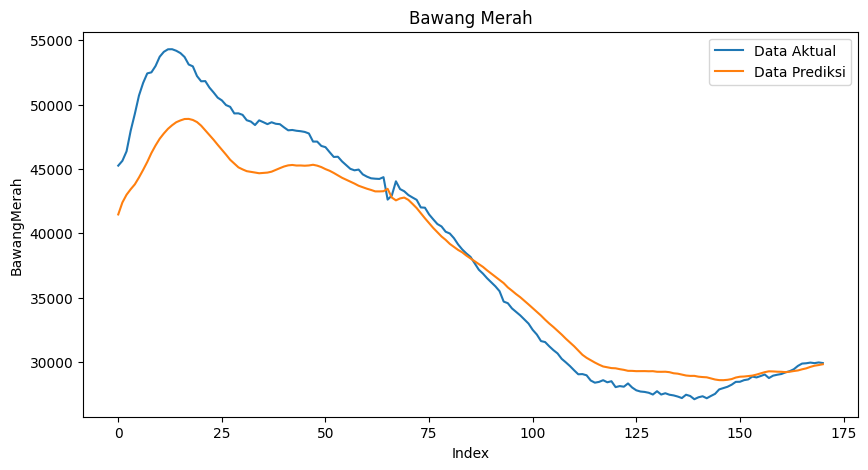

In [56]:
target_index = 0

plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:,target_index], label ="Data Aktual")
plt.plot(predictions[:,target_index], label ="Data Prediksi")
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Bawang Merah")
plt.legend()
plt.show()

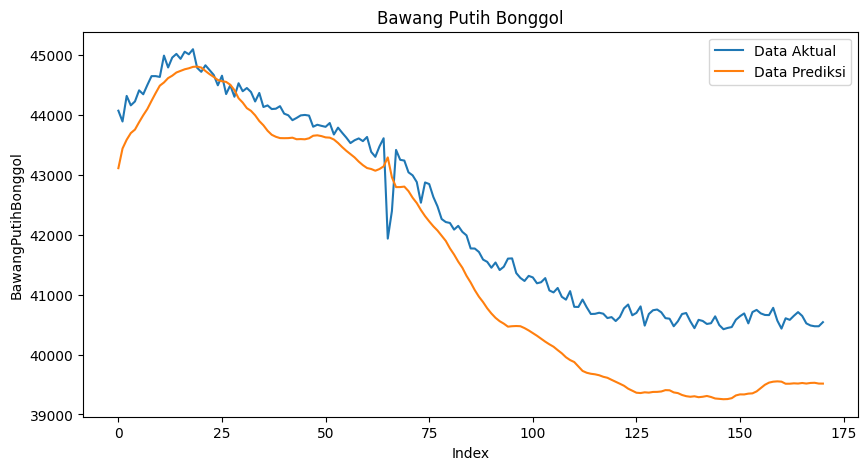

In [59]:
target_index = 1

plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:,target_index], label ="Data Aktual")
plt.plot(predictions[:,target_index], label ="Data Prediksi")
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Bawang Putih Bonggol")
plt.legend()
plt.show()

In [26]:
# feature_to_visualize = 'BawangMerah'
# feature_index = output_features.index(feature_to_visualize)

# actual_values = y_test_asli[:, feature_index]
# predicted_values = predictions[:, feature_index]
# time_index = np.arange(len(actual_values))

# # Buat plot
# plt.figure(figsize=(14, 7))
# plt.plot(time_index, actual_values, label=f'Harga Aktual {feature_to_visualize}')
# plt.plot(time_index, predicted_values, label=f'Prediksi {feature_to_visualize}', color='red', linestyle='dashed')

# plt.title(f'Perbandingan Harga Aktual vs Prediksi untuk {feature_to_visualize}')
# plt.xlabel('Waktu (Indeks Data Pengujian)')
# plt.ylabel('Harga')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()